# Gráfico de Regresión
Es un Scatter Plot con una línea de tendencia (Line of Best Fit). Esta línea representa matemáticamente una regresión lineal con la forma *y = mx + b*. En otras palabras, es una recta con la que yo puedo "predecir" que valor de "y" tendria un nuevo valor de "x". Para este gráfico, ambas variables deben ser numéricas. 
**Eje X**: Variable numérica  
**Eje Y**: Variable numérica  

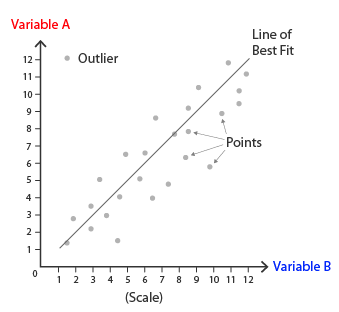

**Ejemplos de Uso**:
- Como un doctor, me gustaría saber si el nivel de colesterol de una persona se correlaciona con su peso

### Cuando utilizar
- Quiero comprobar si existe algun tipo de correlación entre dos variables. 
- Quiero observar la distribución de dos variables al mismo tiempo.

### Consejos
- No es necesario que el eje Y empiece en el valor del "cero"
- No utilices colores innecesariamente. Se pueden pintar los puntos para introducir una (3ra) variable categórica al gráfico. 
- Puedo introducir una 3ra o 4ta variable al gráfico con las siguientes técticas:
  - Diferentes formas en los "puntos" para introducir una variable categórica.
  - Convertirlo en un gráfico de burbujas para introducir una variable numérica.
  - Jugar con la intensidad del color de cada punto para introducir una variable numérica.
- Si tengo muy pocos puntos en mi dataset, el resultado del gráfico no será interpretable
- Si hay una cantidad grande de puntos en mi dataset, podemos coger una muestra, o jugar con la opacidad de los puntos


## En esta clase
### Datos
Información sobre especies de pinguinos
### Objetivos
1. Encontrar alguna correlación entre las características de los pinguinos

## Referencias
- https://datavizcatalogue.com/ES/metodos/diagrama_de_dispersion.html
- https://chartio.com/learn/charts/what-is-a-scatter-plot/

In [1]:
import pandas as pd
import seaborn as sns 

sns.set_style('whitegrid')

Correlacion para entre la longitud de la aleta y la longitud del pico de la especie Gentoo

In [15]:
# Leemos los datos con Pandas
df = pd.read_csv('./pinguinos.csv')
df = df[df['species'] == 'Gentoo']
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [16]:
df = df.dropna() #Eliminar nulos

Para poder calcular el coeficiente de correlacion necesitamos de la libreria scipy para analizar si existe una correlacion fuerte o debil, positiva o negativa.


In [5]:
#Calcular coeficiente de correlacion
%pip install scipy
import scipy as sp

In [17]:
r,p = sp.stats.pearsonr(df['flipper_length_mm'],df['culmen_length_mm'])
r,p 

(0.6617906860524259, 1.8870398188067032e-16)

Con el valor r de Person igual a 0.65 podemos decir que existe un correlacion positiva moderada entre las variables flipper_length_mm y culmen_length_mm (aleta y pico). Tambien podemos decir que el coeficiente tiene significancia del 0.05 al ser el valor P menor que este valor.

Text(225, 42, 'r = 0.66')

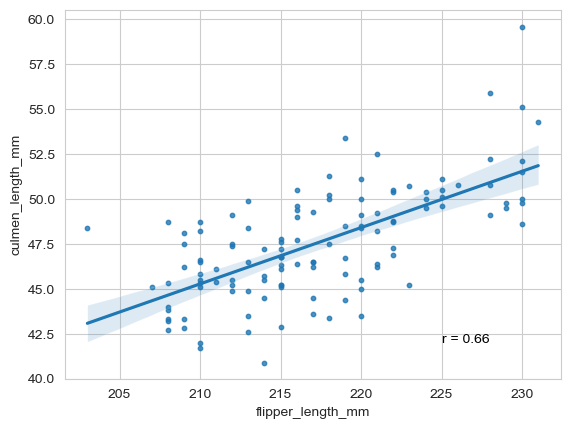

In [19]:
plt = sns.regplot(
    data = df,
    x = 'flipper_length_mm',
    y = 'culmen_length_mm',
    scatter_kws = {
        's':10 #Cambiar tamanio de los puntos
    }
    
)

texto = "r = " + str(r)[0:4]

plt.text(
    225,
    42,
    texto,
    color = "black"
)